In [13]:
from data_generation.gen_data import *
from model.utils import *

import seaborn as sns
import numpy as np

In [ ]:
num_days = [30, 365]
num_samples = [100000]
dist = "logistic"
mode = "histogram"

num_days_num_samples = [(num_day, num_sample) for num_day in num_days for num_sample in num_samples]

for num_day, num_sample in tqdm(num_days_num_samples):
    data = generate_data(num_day, num_sample, dist=dist, mode=mode)
    with open(f"../data/test/{mode}/{dist}_{num_day}_days_{num_sample}_samples.npy", "wb") as f:
        np.save(f, data)

In [66]:
num_day = 365
num_sample = 100000
dist = "logistic"
mode = "plain"

data_path = f"../data/train/{mode}/{dist}_{num_day}_days_{num_sample}_samples.npy"
data = np.load(data_path)
data.shape

(365, 100001)

In [67]:
X, y = data[:, :-1], data[:, -1]
print(X.shape)
print(y.shape)

(365, 100000)
(365,)


In [68]:
min_edge, max_edge = 300, 850
bin_edges = np.arange(min_edge, max_edge + 1, 1)

new_data = []
for i in range(num_day):
    new_data.append(np.array(np.histogram(X[i], bins=bin_edges)[0].tolist() + [y[i]]))
new_data = np.array(new_data)
new_data.shape

(365, 551)

In [69]:
with open(f"../data/train/histogram/{dist}_{num_day}_days_{num_sample}_samples.npy", "wb") as f:
    np.save(f, new_data)

In [13]:
index_0 = np.where(y == 0)[0]
index_0

array([ 0,  1,  4,  5,  6,  7,  8, 10, 11, 12, 13, 18, 19, 21, 23, 24, 26,
       27, 28])

In [14]:
index_1 = np.where(y == 1)[0]
index_1

array([ 2,  3,  9, 14, 15, 16, 17, 20, 22, 25])

0 0
3.1554634083176324e-10 True
0.042441994468518596 False
0.006942625405745021 False
0.014969826876928216 False
0.10518401089160369 True 

1 0
2.115112579468166e-25 True
0.08302383391935717 False
0.025134728188662595 False
0.05641293733607806 False
0.18488793903207126 True 

2 0
0.9992585783584803 False
0.010336976830035646 False
0.0006599628283257383 False
0.0010534210977232092 False
0.009621133918871708 False 

3 0
0.0003960229461626993 True
0.028623584179578485 False
0.0035936650742582343 False
0.0069724874094490505 False
0.055594980924637244 False 

4 0
8.175494994388866e-11 True
0.042069616267537364 False
0.006863444739024791 False
0.014388966607041545 False
0.10249381850910352 True 

5 0
5.105500188303281e-39 True
0.07651769731866835 False
0.024580498576142987 False
0.047661901137536704 False
0.16835373826821926 True 

6 0
0.0034908587545203736 True
0.022467554967412744 False
0.0019825093862926527 False
0.004044606601631382 False
0.05843442524525625 False 

7 0
1.083387255377307

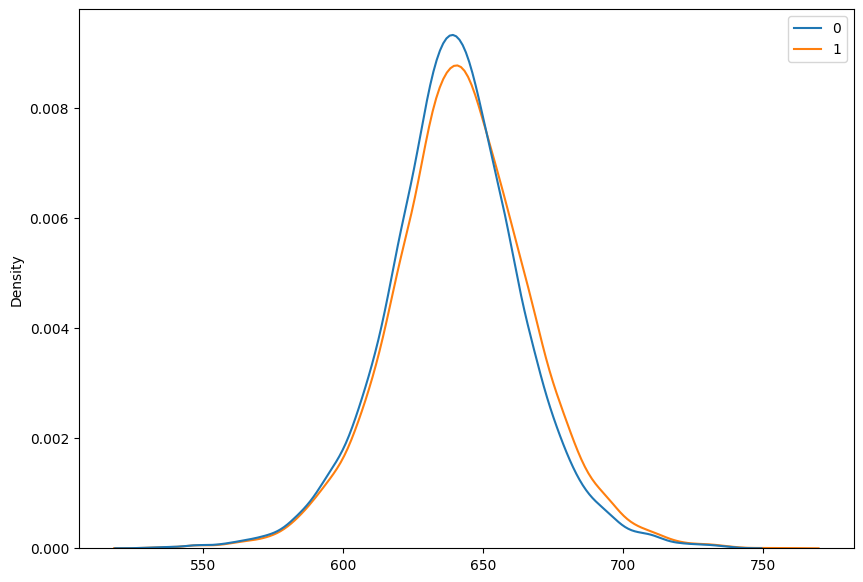

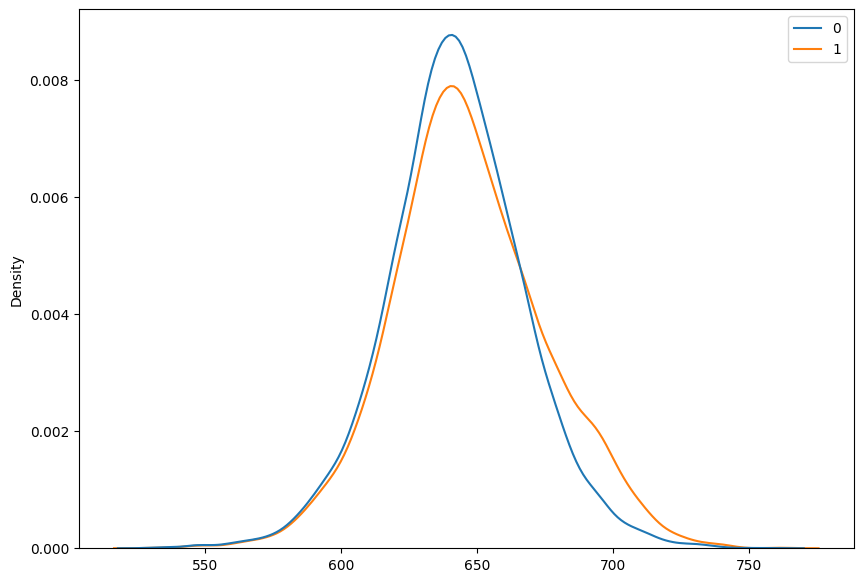

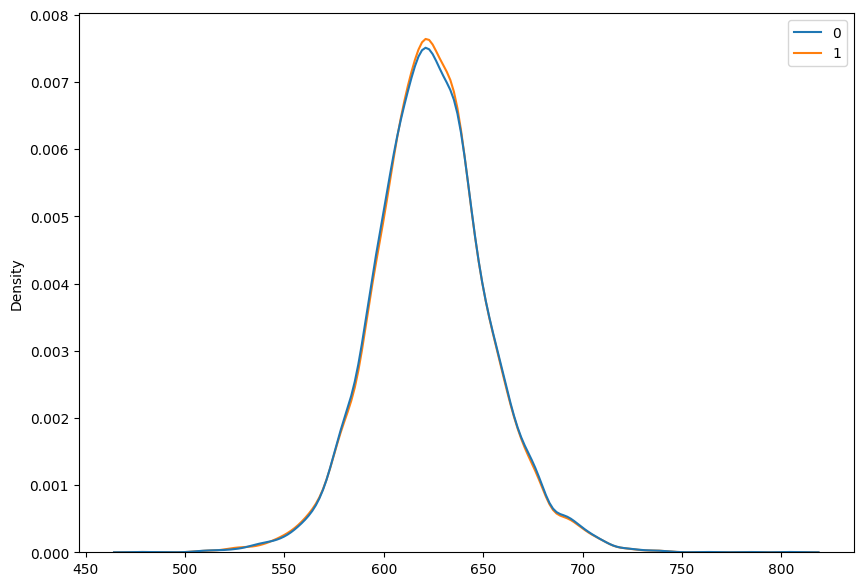

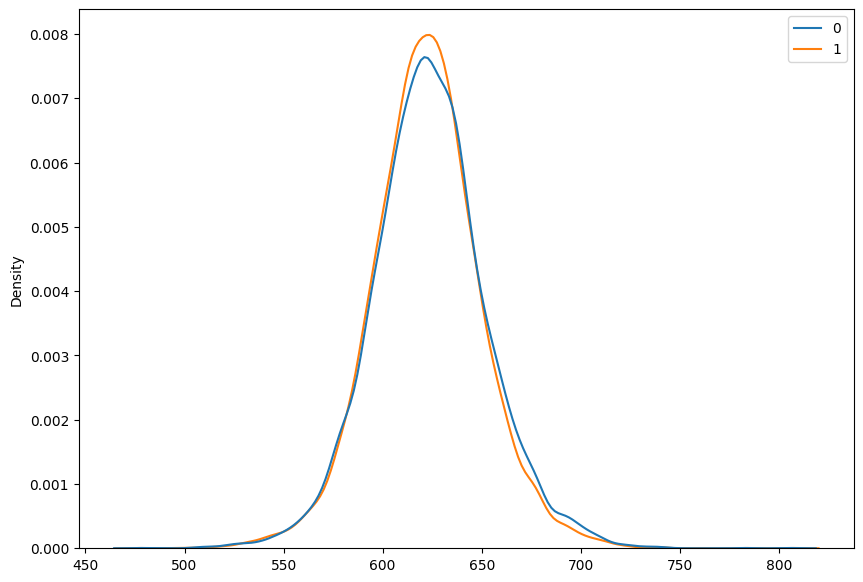

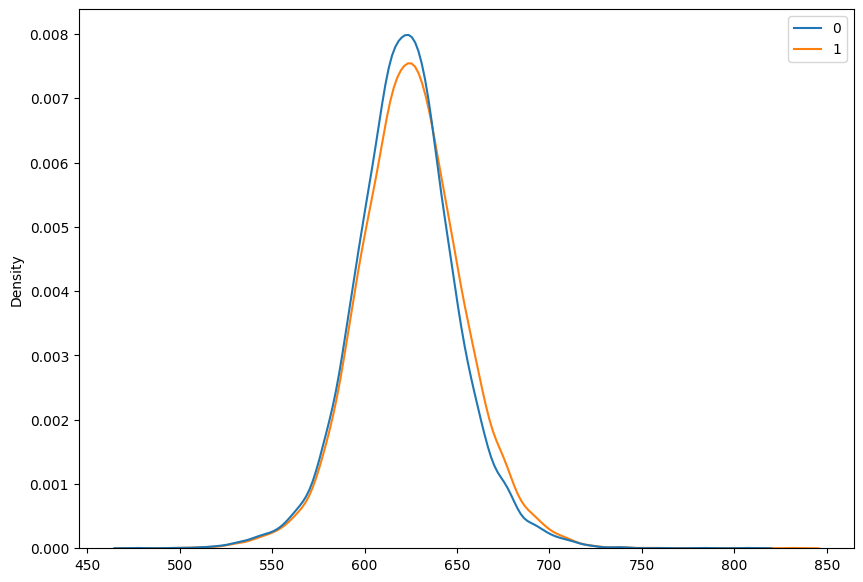

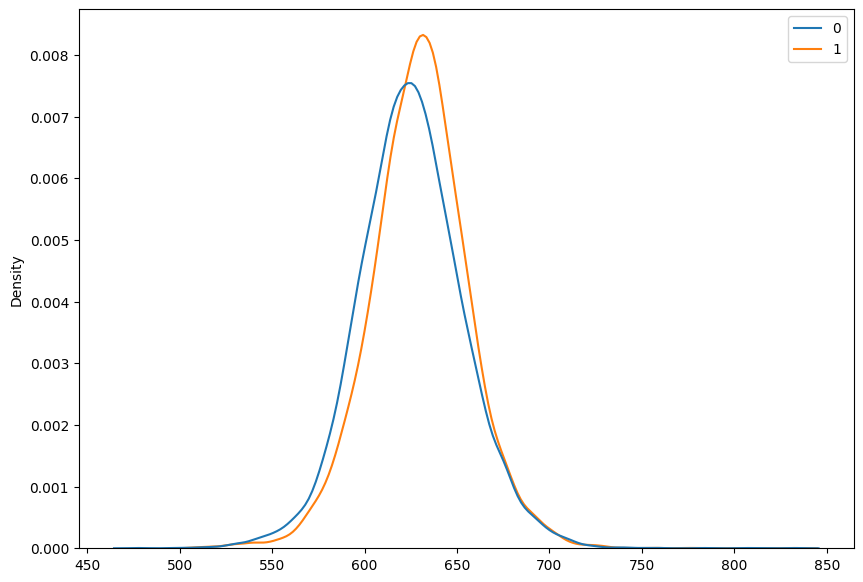

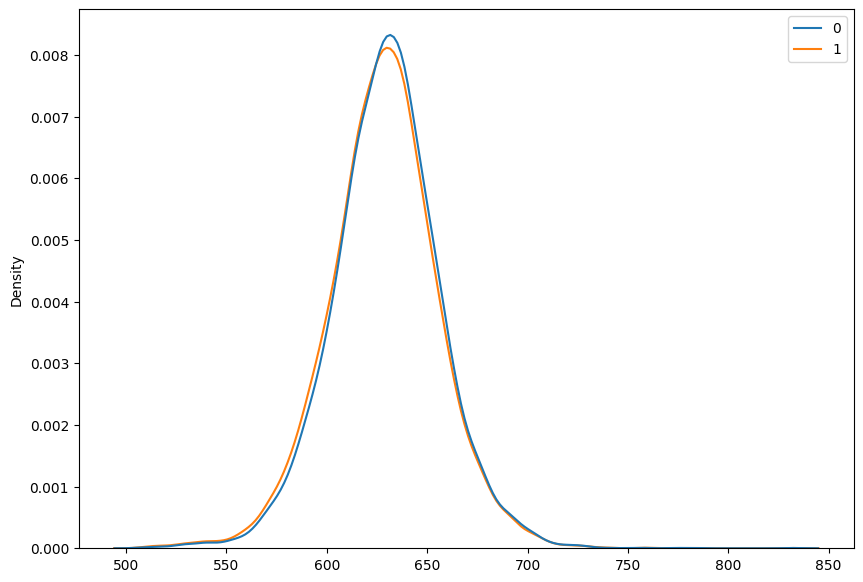

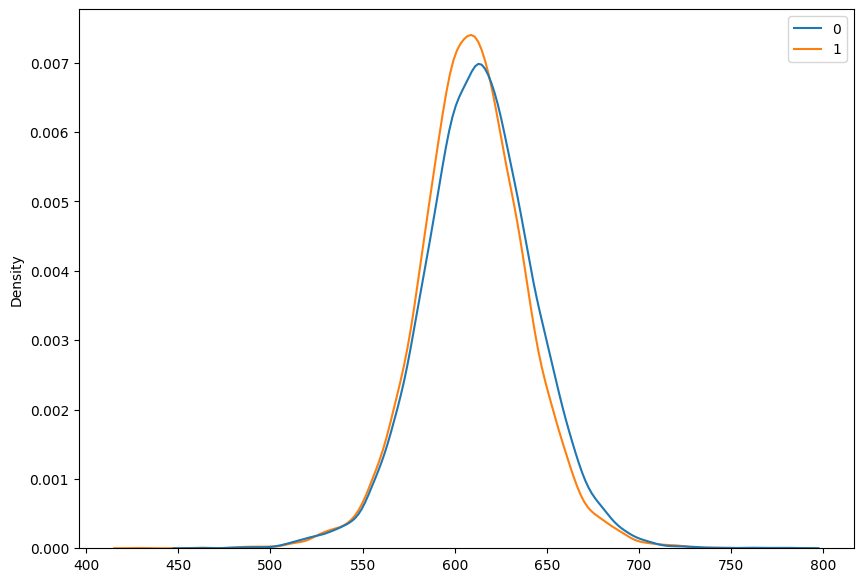

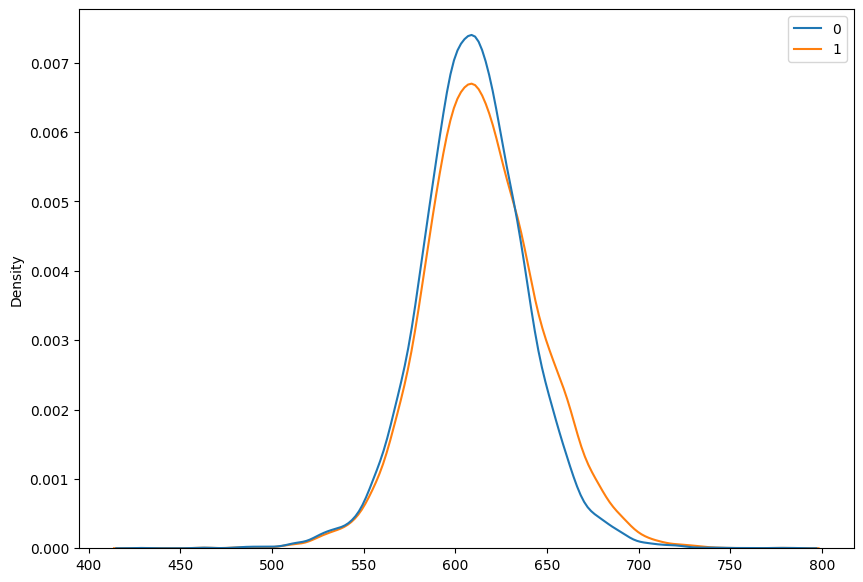

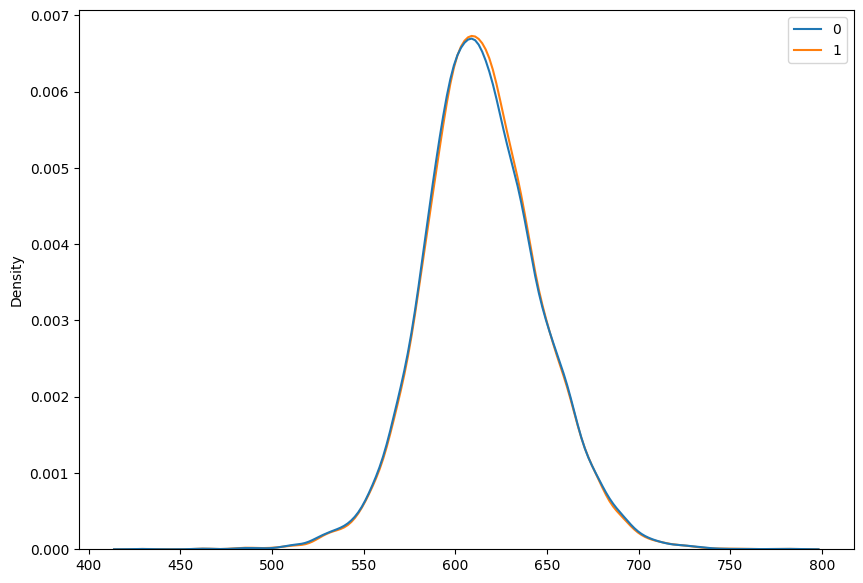

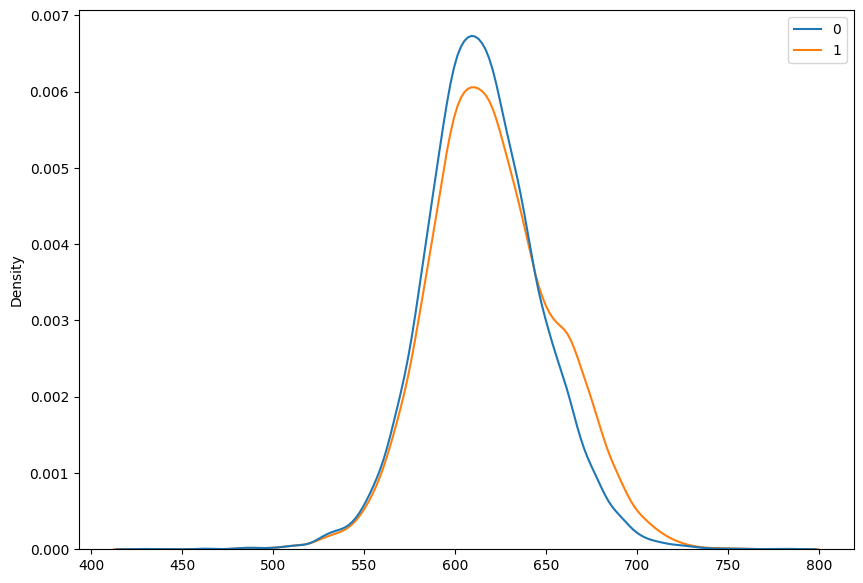

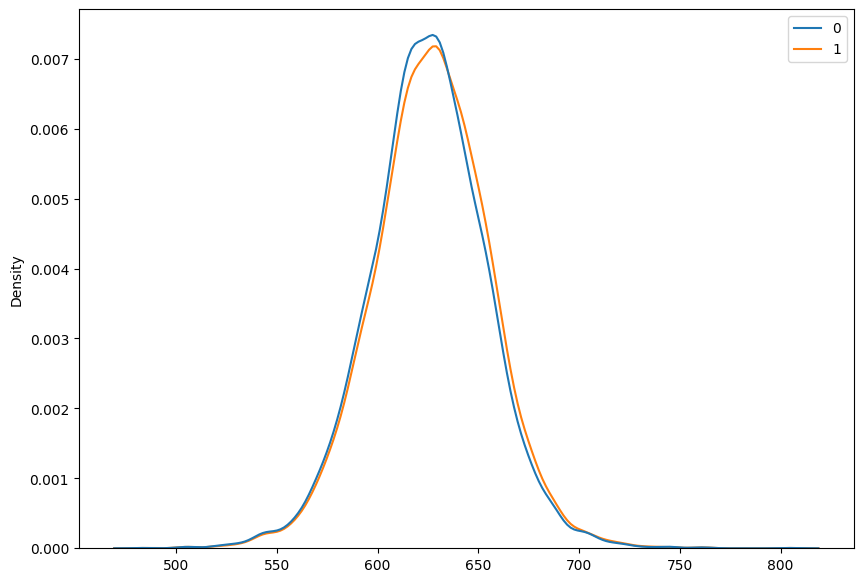

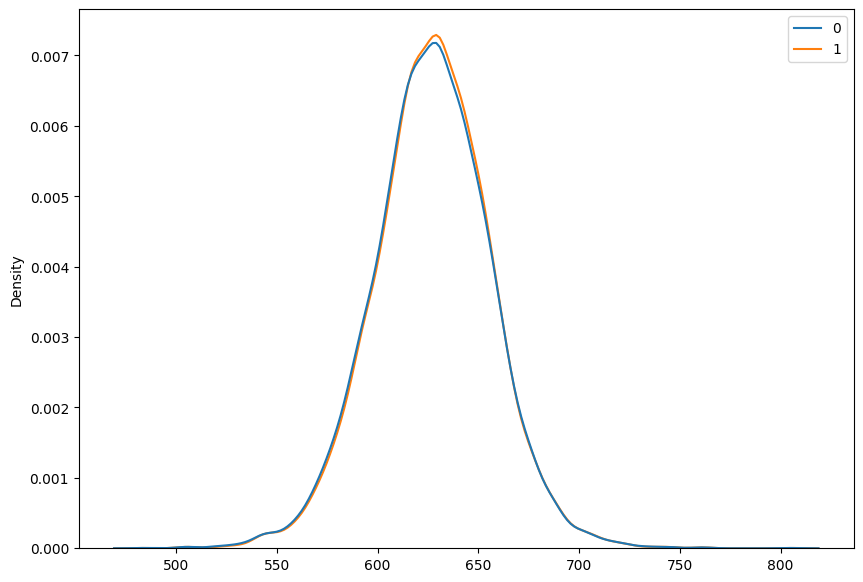

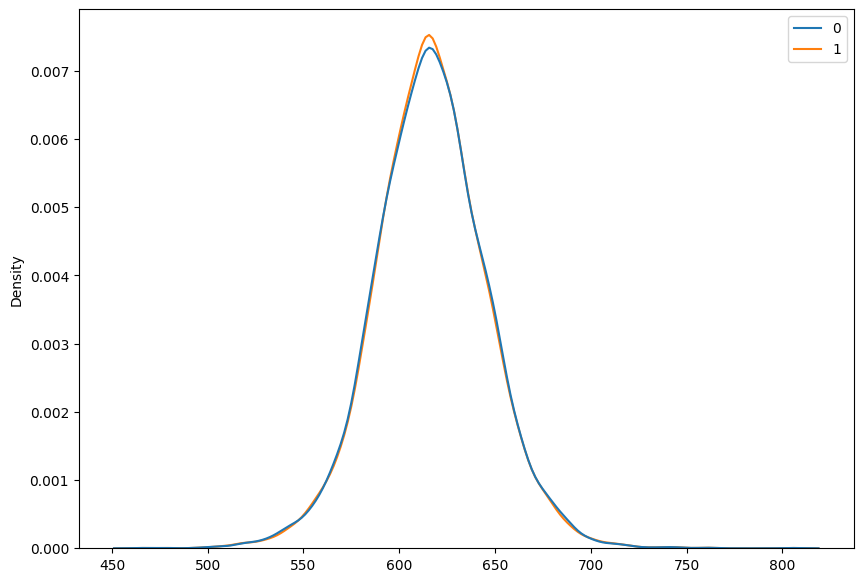

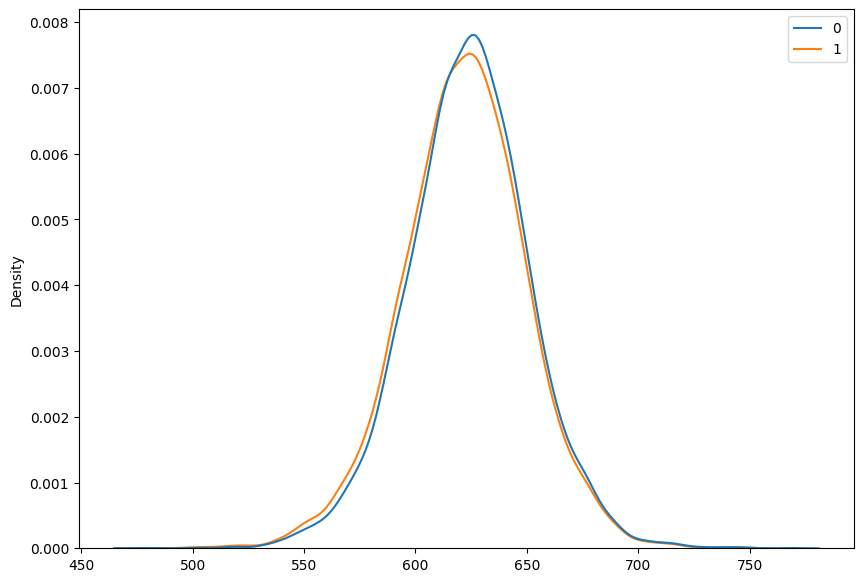

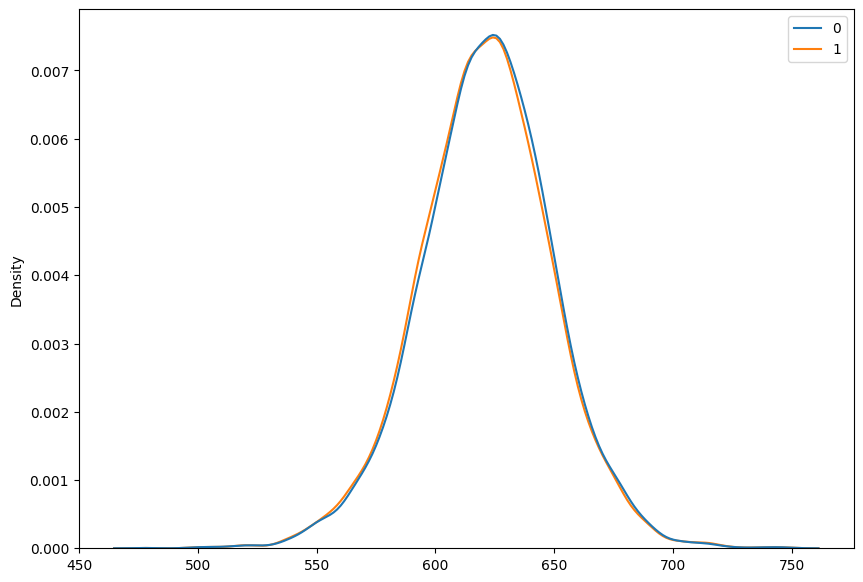

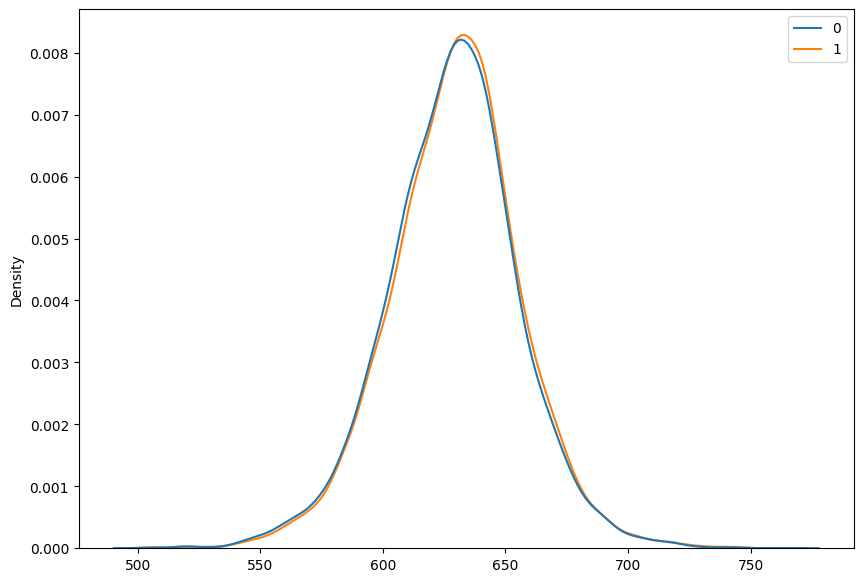

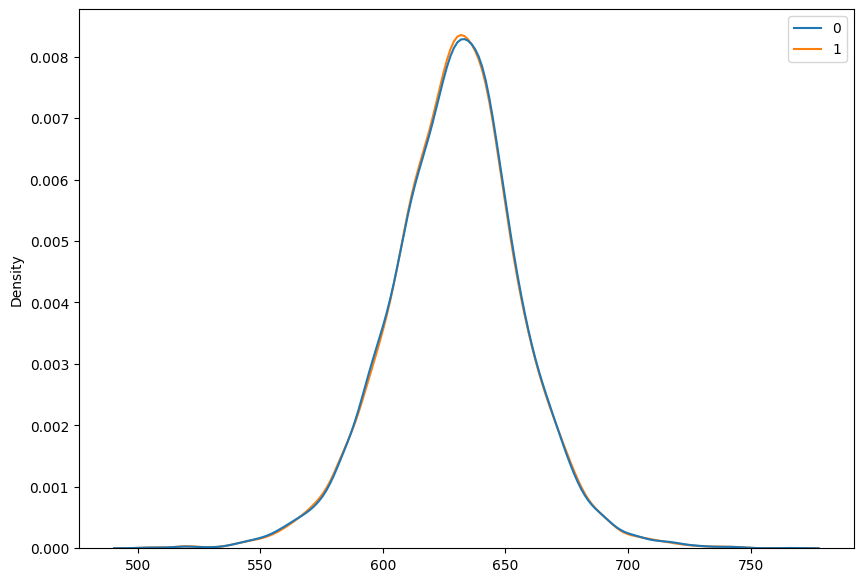

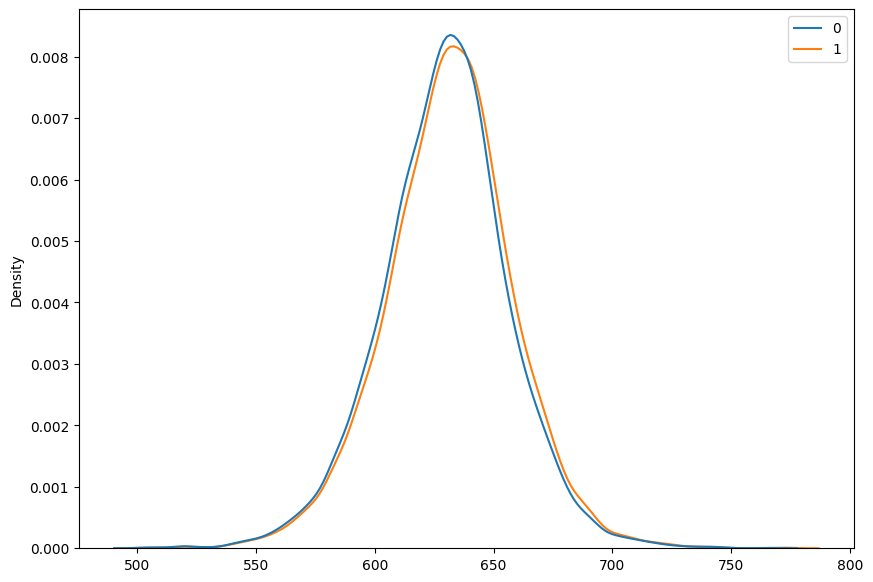

In [15]:
for idx, i in enumerate(index_0):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i], X[i + 1]])

    print(idx, y[i])

    value, is_drift = ks(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = js(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = kl_div(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = psi(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = wd(X[i], X[i + 1])
    print(value, is_drift, "\n")

0 1
5.2274051049248315e-143 True
0.15500817925484892 True
0.0951817238053469 False
0.19813020786610047 True
0.43571994398163305 True 

1 1
2.4780400225719805e-118 True
0.13524169256259763 True
0.07298177147158574 False
0.1501179059335271 True
0.37621323487452374 True 

2 1
4.3408749284923355e-254 True
0.19112130816254919 True
0.14174720240916672 True
0.3023469050716943 True
0.5522953515591293 True 

3 1
2.8166773e-314 True
0.20388920409536476 True
0.17212038339026692 True
0.3401405651196111 True
0.4695605663203064 True 

4 1
1.5935985715067937e-121 True
0.12862326290222775 True
0.0691116216439414 False
0.13453976365455736 True
0.28556745197072814 True 

5 1
1.9572333401514638e-92 True
0.11511586247420298 True
0.055389949819715324 False
0.10726793543475979 True
0.2873875247847262 True 

6 1
7.990718342591907e-159 True
0.14754818772106953 True
0.0857005932447956 False
0.176891498946833 True
0.4164835786829919 True 

7 1
8.129768732768208e-122 True
0.13554140213650248 True
0.0737927200648

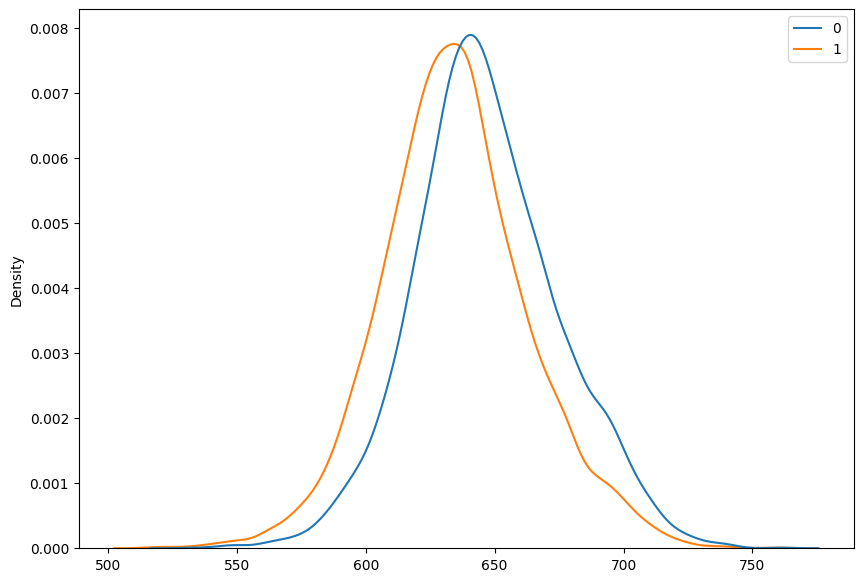

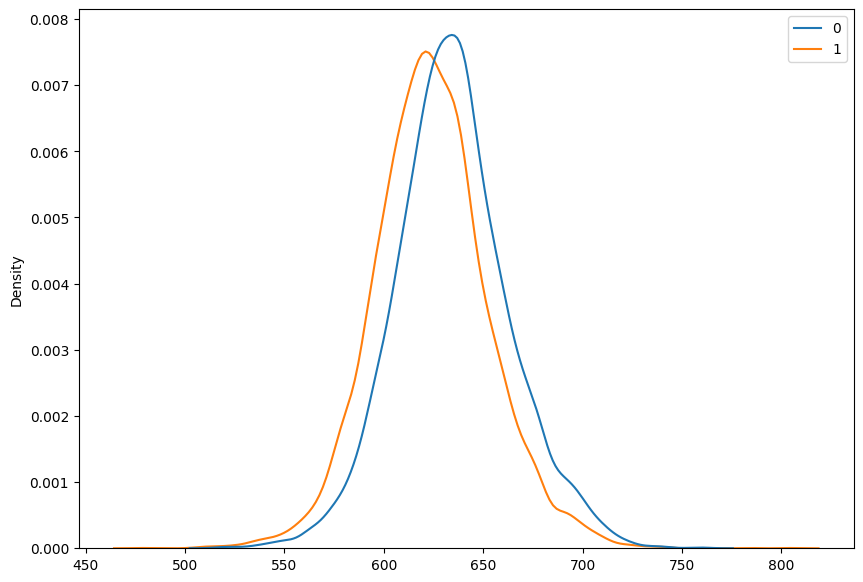

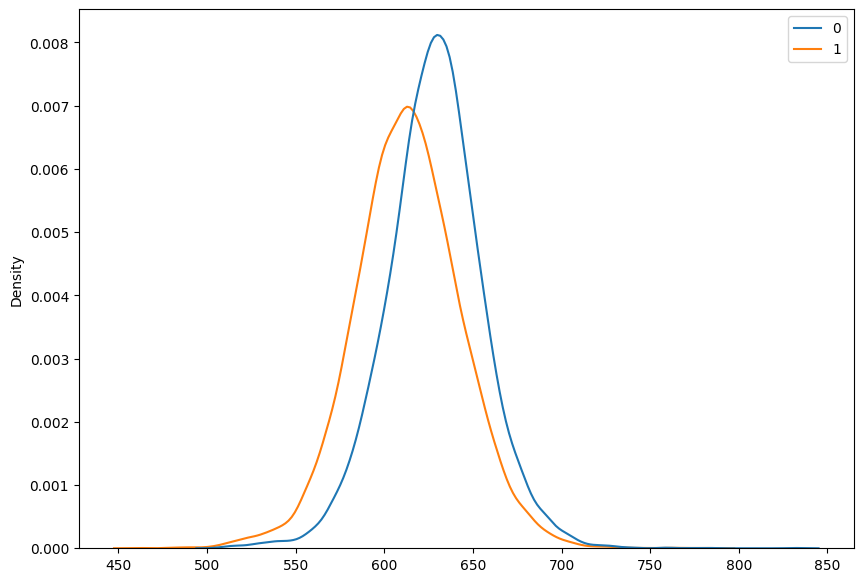

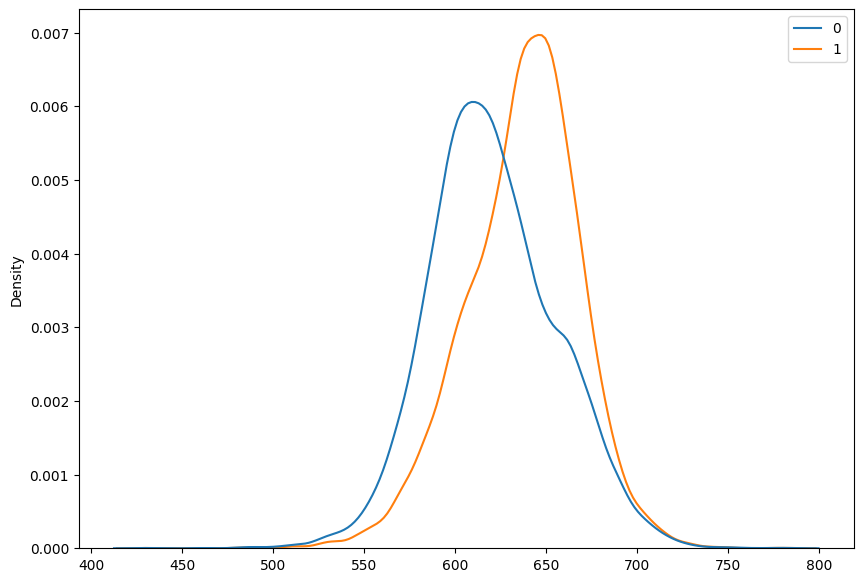

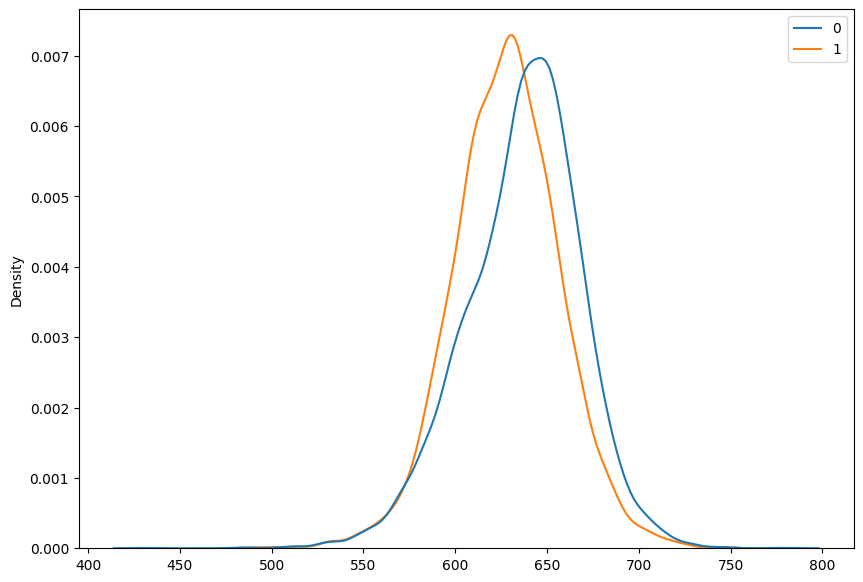

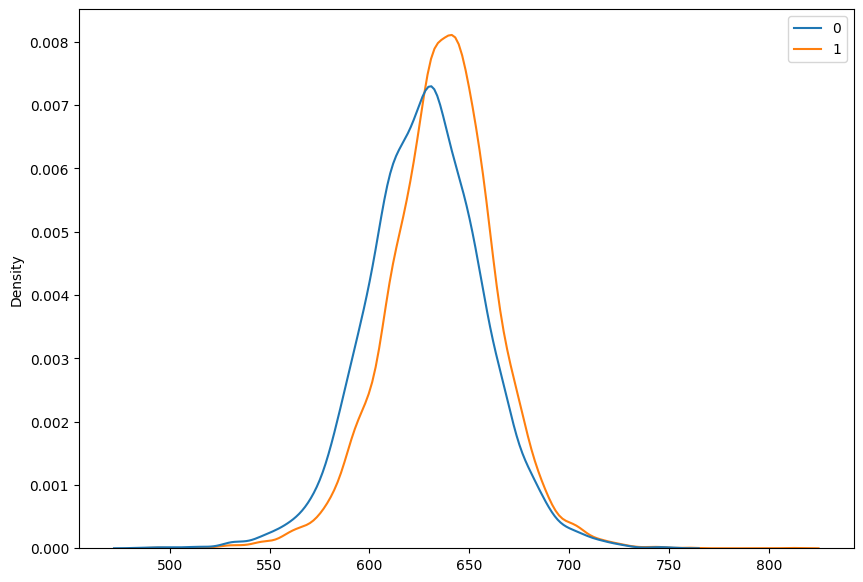

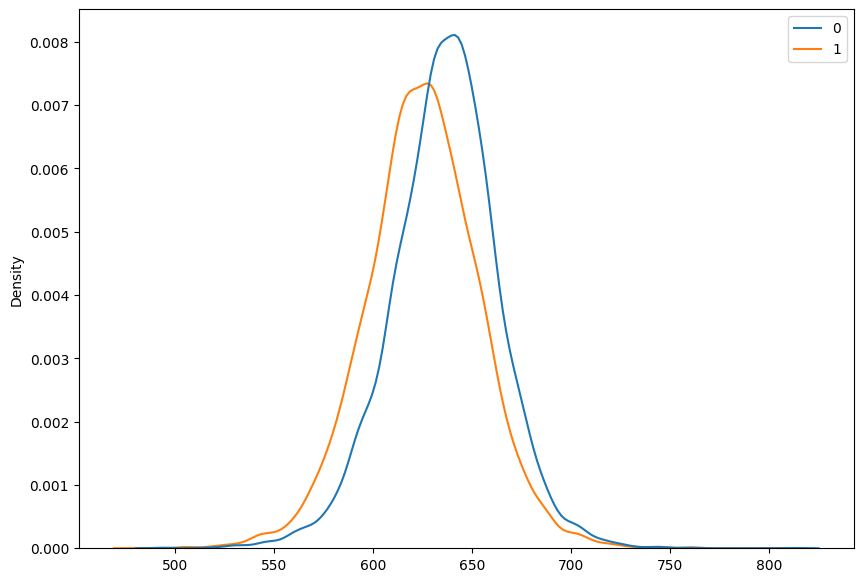

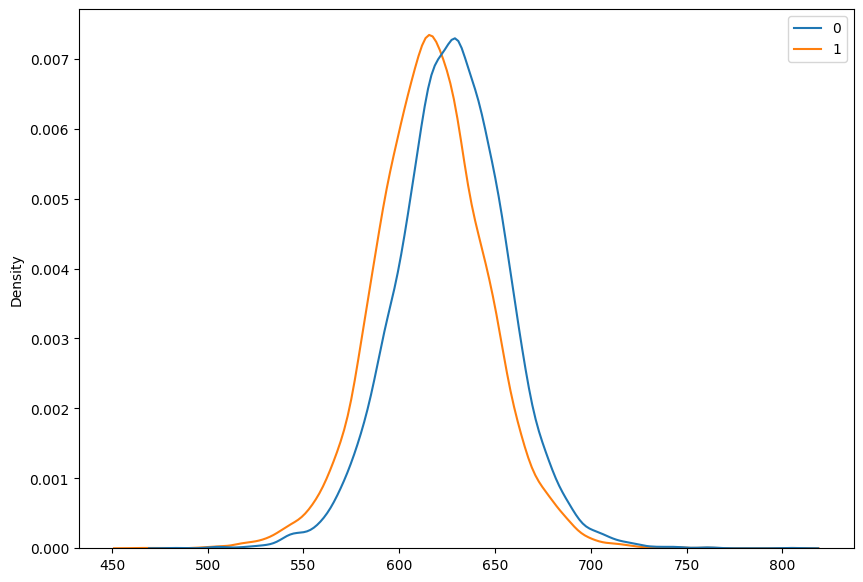

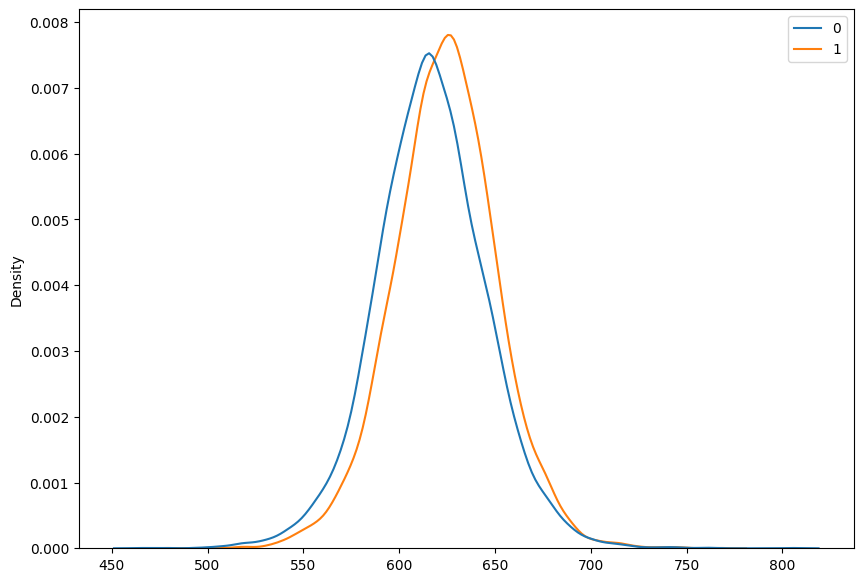

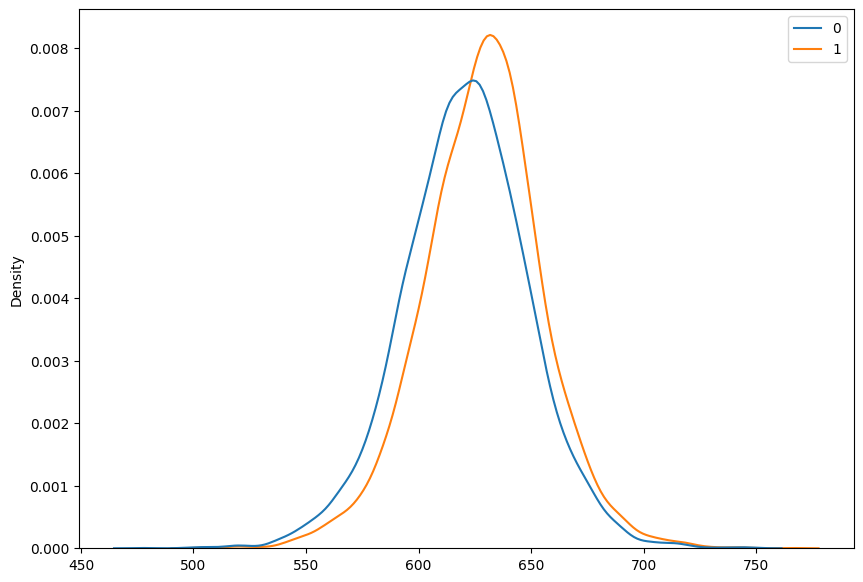

In [16]:
for idx, i in enumerate(index_1):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i], X[i + 1]])

    print(idx, y[i])

    value, is_drift = ks(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = js(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = kl_div(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = psi(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = wd(X[i], X[i + 1])
    print(value, is_drift, "\n")

# Modeling

In [5]:
data_path = "../data/train/hist/logistic_30_days_10000_samples.npy"
data = np.load(data_path)
data.shape

(30, 552)

In [ ]:
train_data

In [7]:
X, y = data[:, :-1], data[:, -1]

0
0.0872292114170121 False
0.030448089121332417 False
0.06111751463581387 False
0.2239636209121661 True


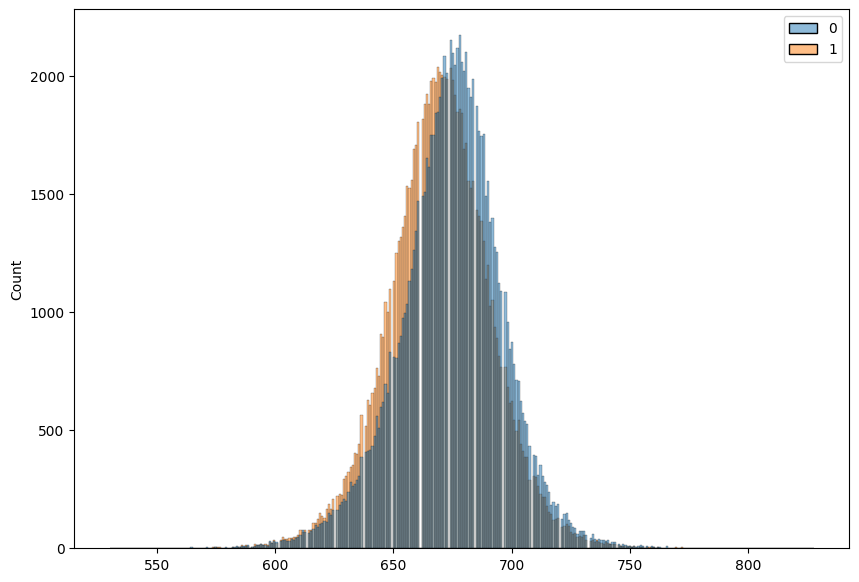

In [6]:
i =58

print(y[i + 1])

plt.figure(figsize=(10, 7))
sns.histplot([X[i], X[i + 1]])

value, is_drift = js(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = kl_div(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = psi(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = wd(X[i], X[i + 1])
print(value, is_drift)

In [3]:
with open("../data/train/logistic_30_days_100000_samples.np", "wb") as f:
    np.save(f, data)